In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
%matplotlib inline
import json
import requests

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import string
import re
import scipy.stats as stats
from nltk import FreqDist
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer


import pickle

import warnings
warnings.filterwarnings("ignore")

np.random.seed(7)

# Importing Data Sources

In [2]:
df_KaggleTrain = pd.read_csv('data/KaggleTrain.csv')

In [3]:
#1: unreliable
#0: reliable
df_KaggleTrain

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df_KaggleTrain.drop(['author', 'id'], axis=1, inplace=True)
df_KaggleTrain['source'] = 'Kaggle'
df_KaggleTrain

,title,text,label,source
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Kaggle
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,Kaggle
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Kaggle
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,Kaggle
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Kaggle
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle
20797,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle
20798,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle


In [5]:
df_DataFlair = pd.read_csv('data/DataFlairnews.csv')

In [6]:
df_DataFlair

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [7]:
df_DataFlair['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
df_DataFlair.drop('Unnamed: 0', axis=1, inplace=True)
df_DataFlair['source'] = 'DataFlair'
df_DataFlair

,title,text,label,source
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,DataFlair
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,DataFlair
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,DataFlair
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,DataFlair
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,DataFlair
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,DataFlair
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,DataFlair
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,DataFlair
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,DataFlair


In [9]:
df_ISOT_true = pd.read_csv('data/ISOTTrue.csv')
df_ISOT_false = pd.read_csv('data/ISOTFake.csv')

In [10]:
df_ISOT_false

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [11]:
df_ISOT_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [12]:
df_ISOT_true['label'] = 0
df_ISOT_true['source'] = 'ISOT'
df_ISOT_false['label'] = 1
df_ISOT_false['source'] = 'ISOT'
df_ISOT_true.drop(['subject', 'date'], axis=1, inplace=True)
df_ISOT_false.drop(['subject', 'date'], axis=1, inplace=True)

# Final Dataframe

ISOT - focused mostly on collecting articles from 2016 to 2017. https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php <br>
Kaggle - https://www.kaggle.com/c/fake-news/overview <br>
Dataflair - https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [13]:
dfList = [df_ISOT_true, df_ISOT_false, df_DataFlair, df_KaggleTrain]
df_MAIN = pd.concat(dfList, ignore_index=True)
df_MAIN

,title,text,label,source
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT
...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle


In [14]:
df_MAIN['label'].value_counts()

1       33894
0       31804
REAL     3171
FAKE     3164
Name: label, dtype: int64

In [15]:
#0 = True
#1 = False

conditions = [
    df_MAIN['label'] == 1, 
    df_MAIN['label'] == 0,
    df_MAIN['label'] == 'REAL',
    df_MAIN['label'] == 'FAKE'
]

choices = [
    1, 
    0, 
    0,
    1
]

df_MAIN['label'] = np.select(conditions, choices, default='NA')
df_MAIN['label'].value_counts()

1    37058
0    34975
Name: label, dtype: int64

In [16]:
df = df_MAIN
df

,title,text,label,source
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT
...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72033 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71475 non-null  object
 1   text    71994 non-null  object
 2   label   72033 non-null  object
 3   source  72033 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [18]:
df.dropna(axis=0, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71436 entries, 0 to 72032
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71436 non-null  object
 1   text    71436 non-null  object
 2   label   71436 non-null  object
 3   source  71436 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [20]:
#removing Reuters heading

def reuters(text):
    reuters = '(Reuters) - '
    if reuters in text:
        return text[text.find(reuters)+len(reuters):]
    else:
        return text

df['text_cleaned'] = df['text'].apply(reuters)
df

,title,text,label,source,text_cleaned
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,President Donald Trump called on the U.S. Post...
...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,Rapper T. I. unloaded on black celebrities who...
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,When the Green Bay Packers lost to the Washing...
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle,The Macy’s of today grew from the union of sev...
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [21]:
punct = set(string.punctuation)

def tokenize_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in punct]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return nltk.word_tokenize(text_no_doublespace)

df['text_cleaned_tokenized'] = df['text_cleaned'].apply(tokenize_text)
#text_cleaned column has no reuters heading, stop words, numbers, punctuation or whitespaces
df['text_cleaned'] = df['text_cleaned_tokenized'].apply(' '.join)
df

,title,text,label,source,text_cleaned,text_cleaned_tokenized
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,the head of a conservative republican faction ...,"[the, head, of, a, conservative, republican, f..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people will be allowed for the fir...,"[transgender, people, will, be, allowed, for, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,the special counsel investigation of links bet...,"[the, special, counsel, investigation, of, lin..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos tol...,"[trump, campaign, adviser, george, papadopoulo..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called on the us postal...,"[president, donald, trump, called, on, the, us..."
...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper t i unloaded on black celebrities who m...,"[rapper, t, i, unloaded, on, black, celebritie..."
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,when the green bay packers lost to the washing...,"[when, the, green, bay, packers, lost, to, the..."
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle,the macy ’ s of today grew from the union of s...,"[the, macy, ’, s, of, today, grew, from, the, ..."
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle,nato russia to hold parallel exercises in balk...,"[nato, russia, to, hold, parallel, exercises, ..."


In [22]:
words_split = []

for text in df['text_cleaned_tokenized']:
    words_split += text

list_words_one_character = []

for word in words_split:
    if len(word) == 1:
        list_words_one_character.append(word)
        
display(set(list_words_one_character))

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\x7f',
 '\x80',
 '\x92',
 '\x93',
 '\x94',
 '\x95',
 '\x96',
 '\x97',
 '¢',
 '£',
 '¥',
 '§',
 '¨',
 '©',
 'ª',
 '«',
 '\xad',
 '®',
 '¯',
 '°',
 '±',
 '´',
 '¶',
 '·',
 '¹',
 'º',
 '»',
 '¼',
 '½',
 '¾',
 '¿',
 '×',
 'à',
 'â',
 'å',
 'ç',
 'è',
 'é',
 'ó',
 'ô',
 '÷',
 'ü',
 'ı',
 'š',
 'ť',
 '˘',
 '˚',
 'ή',
 'β',
 'η',
 'κ',
 'μ',
 'ξ',
 'ο',
 'π',
 'ω',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'и',
 'й',
 'к',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'х',
 'ъ',
 'ы',
 'э',
 'ю',
 'я',
 'א',
 'ב',
 'ג',
 'ד',
 'ה',
 'ו',
 'ל',
 'ש',
 '،',
 '؟',
 'إ',
 'ب',
 'ر',
 'س',
 'ك',
 'ن',
 'و',
 'ὢ',
 '\u200b',
 '\u200e',
 '‐',
 '‒',
 '–',
 '—',
 '―',
 '‘',
 '’',
 '‚',
 '“',
 '”',
 '„',
 '†',
 '•',
 '…',
 '′',
 '″',
 '‹',
 '›',
 '⁄',
 '€',
 '₹',
 '№',
 '™',
 '⅔',
 '⅛',
 '←',
 '↑',
 '→',
 '⇩',
 '−',
 '∞',
 '≫',
 '■',
 '►',
 '◆

In [23]:
#removing stopwords
words = stopwords.words("english")

#remove floating letters
alphabet = string.ascii_lowercase
for i in alphabet:
    words.append(i)

#remove additional floating characters
for i in list_words_one_character:
    words.append(i)
    
words = set(words)

df['text_cleaned_tokenized'] = df['text_cleaned_tokenized'].apply(lambda x: [item for item in x if item not in words])
df['text_tokenized_string'] = df['text_cleaned_tokenized'].apply(' '.join)

#make sure text fields doesn't have any "leakage" in regards to which data source an article came form
custom_words = ['’', '“', '”', '—', '‘', 'st', 'say', 'said', 'on', 'told', 're', 'would', 'could', 'monday', 'tuesday', 
                'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'two', '–', 'mr', 'mrs', 'ms', 'one', 'also', 'like',
                'century wire', 'wire', '21wire', 'featured image', 'com', 'https', 'www', 'image via', 'via', 'image', 
                'st century', 'twitter', 'on', 'breitbart', 'read more', 'reuters', 'follow', 'flickr', 'getty', 'please', 
               'watch', 'video', 'january', 'feburary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 
               'october', 'november', 'december', 'images', 'getty images', 'featured']

custom_words = set(custom_words)
    
df['text_cleaned'] = df['text_cleaned_tokenized'].apply(lambda x: [item for item in x if item not in custom_words])
df['text_cleaned'] = df['text_cleaned'].apply(' '.join)

df['text_cleaned_tokenized'] = df['text_cleaned_tokenized'].apply(lambda x: [item for item in x if item not in custom_words])
df['text_tokenized_string'] = df['text_cleaned_tokenized'].apply(' '.join)


df

,title,text,label,source,text_cleaned,text_cleaned_tokenized,text_tokenized_string
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,head conservative republican faction us congre...,"[head, conservative, republican, faction, us, ...",head conservative republican faction us congre...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people allowed first time enlist u...,"[transgender, people, allowed, first, time, en...",transgender people allowed first time enlist u...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,special counsel investigation links russia pre...,"[special, counsel, investigation, links, russi...",special counsel investigation links russia pre...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos aus...,"[trump, campaign, adviser, george, papadopoulo...",trump campaign adviser george papadopoulos aus...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called us postal servic...,"[president, donald, trump, called, us, postal,...",president donald trump called us postal servic...
...,...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper unloaded black celebrities met donald t...,"[rapper, unloaded, black, celebrities, met, do...",rapper unloaded black celebrities met donald t...
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,green bay packers lost washington redskins wee...,"[green, bay, packers, lost, washington, redski...",green bay packers lost washington redskins wee...
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle,macy today grew union several great names amer...,"[macy, today, grew, union, several, great, nam...",macy today grew union several great names amer...
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle,nato russia hold parallel exercises balkans pr...,"[nato, russia, hold, parallel, exercises, balk...",nato russia hold parallel exercises balkans pr...


In [24]:
#POS tagging to lemmatize text
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_text(text):
    #tokenize text and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(text))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_text = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_text.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_text)

# Lemmatizing
df['text_pos_lemmatized'] = df['text_tokenized_string'].apply(lambda x: lemmatize_text(x))
df

,title,text,label,source,text_cleaned,text_cleaned_tokenized,text_tokenized_string,text_pos_lemmatized
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,head conservative republican faction us congre...,"[head, conservative, republican, faction, us, ...",head conservative republican faction us congre...,head conservative republican faction us congre...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people allowed first time enlist u...,"[transgender, people, allowed, first, time, en...",transgender people allowed first time enlist u...,transgender people allow first time enlist us ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,special counsel investigation links russia pre...,"[special, counsel, investigation, links, russi...",special counsel investigation links russia pre...,special counsel investigation link russia pres...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos aus...,"[trump, campaign, adviser, george, papadopoulo...",trump campaign adviser george papadopoulos aus...,trump campaign adviser george papadopoulos aus...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called us postal servic...,"[president, donald, trump, called, us, postal,...",president donald trump called us postal servic...,president donald trump call us postal service ...
...,...,...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper unloaded black celebrities met donald t...,"[rapper, unloaded, black, celebrities, met, do...",rapper unloaded black celebrities met donald t...,rapper unload black celebrity meet donald trum...
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,green bay packers lost washington redskins wee...,"[green, bay, packers, lost, washington, redski...",green bay packers lost washington redskins wee...,green bay packer lose washington redskins week...
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle,macy today grew union several great names amer...,"[macy, today, grew, union, several, great, nam...",macy today grew union several great names amer...,macy today grow union several great name ameri...
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle,nato russia hold parallel exercises balkans pr...,"[nato, russia, hold, parallel, exercises, balk...",nato russia hold parallel exercises balkans pr...,nato russia hold parallel exercise balkans pre...


In [25]:
stemmer = SnowballStemmer('english')

df['text_snowball_stemmed'] = df['text_cleaned_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df

,title,text,label,source,text_cleaned,text_cleaned_tokenized,text_tokenized_string,text_pos_lemmatized,text_snowball_stemmed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,head conservative republican faction us congre...,"[head, conservative, republican, faction, us, ...",head conservative republican faction us congre...,head conservative republican faction us congre...,"[head, conserv, republican, faction, us, congr..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people allowed first time enlist u...,"[transgender, people, allowed, first, time, en...",transgender people allowed first time enlist u...,transgender people allow first time enlist us ...,"[transgend, peopl, allow, first, time, enlist,..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,special counsel investigation links russia pre...,"[special, counsel, investigation, links, russi...",special counsel investigation links russia pre...,special counsel investigation link russia pres...,"[special, counsel, investig, link, russia, pre..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos aus...,"[trump, campaign, adviser, george, papadopoulo...",trump campaign adviser george papadopoulos aus...,trump campaign adviser george papadopoulos aus...,"[trump, campaign, advis, georg, papadopoulo, a..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called us postal servic...,"[president, donald, trump, called, us, postal,...",president donald trump called us postal servic...,president donald trump call us postal service ...,"[presid, donald, trump, call, us, postal, serv..."
...,...,...,...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper unloaded black celebrities met donald t...,"[rapper, unloaded, black, celebrities, met, do...",rapper unloaded black celebrities met donald t...,rapper unload black celebrity meet donald trum...,"[rapper, unload, black, celebr, met, donald, t..."
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,green bay packers lost washington redskins wee...,"[green, bay, packers, lost, washington, redski...",green bay packers lost washington redskins wee...,green bay packer lose washington redskins week...,"[green, bay, packer, lost, washington, redskin..."
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle,macy today grew union several great names amer...,"[macy, today, grew, union, several, great, nam...",macy today grew union several great names amer...,macy today grow union several great name ameri...,"[maci, today, grew, union, sever, great, name,..."
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle,nato russia hold parallel exercises balkans pr...,"[nato, russia, hold, parallel, exercises, balk...",nato russia hold parallel exercises balkans pr...,nato russia hold parallel exercise balkans pre...,"[nato, russia, hold, parallel, exercis, balkan..."


In [26]:
df['text_snowball_stemmed'] = df['text_snowball_stemmed'].apply(' '.join)

In [27]:
stemmer = PorterStemmer()

df['text_porter_stemmed_for_visual'] = df['text_cleaned_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df

,title,text,label,source,text_cleaned,text_cleaned_tokenized,text_tokenized_string,text_pos_lemmatized,text_snowball_stemmed,text_porter_stemmed_for_visual
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,head conservative republican faction us congre...,"[head, conservative, republican, faction, us, ...",head conservative republican faction us congre...,head conservative republican faction us congre...,head conserv republican faction us congress vo...,"[head, conserv, republican, faction, us, congr..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people allowed first time enlist u...,"[transgender, people, allowed, first, time, en...",transgender people allowed first time enlist u...,transgender people allow first time enlist us ...,transgend peopl allow first time enlist us mil...,"[transgend, peopl, allow, first, time, enlist,..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,special counsel investigation links russia pre...,"[special, counsel, investigation, links, russi...",special counsel investigation links russia pre...,special counsel investigation link russia pres...,special counsel investig link russia presid tr...,"[special, counsel, investig, link, russia, pre..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos aus...,"[trump, campaign, adviser, george, papadopoulo...",trump campaign adviser george papadopoulos aus...,trump campaign adviser george papadopoulos aus...,trump campaign advis georg papadopoulo austral...,"[trump, campaign, advis, georg, papadopoulo, a..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called us postal servic...,"[president, donald, trump, called, us, postal,...",president donald trump called us postal servic...,president donald trump call us postal service ...,presid donald trump call us postal servic char...,"[presid, donald, trump, call, us, postal, serv..."
...,...,...,...,...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper unloaded black celebrities met donald t...,"[rapper, unloaded, black, celebrities, met, do...",rapper unloaded black celebrities met donald t...,rapper unload black celebrity meet donald trum...,rapper unload black celebr met donald trump el...,"[rapper, unload, black, celebr, met, donald, t..."
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,green bay packers lost washington redskins wee...,"[green, bay, packers, lost, washington, redski...",green bay packers lost washington redskins wee...,green bay packer lose washington redskins week...,green bay packer lost washington redskin week ...,"[green, bay, packer, lost, washington, redskin..."
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle,macy today grew union several great names amer...,"[macy, today, grew, union, several, great, nam...",macy today grew union several great names amer...,macy today grow union several great name ameri...,maci today grew union sever great name america...,"[maci, today, grew, union, sever, great, name,..."
72031,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,Kaggle,nato russia hold parallel exercises balkans pr...,"[nato, russia, hold, parallel, exercises, balk...",nato russia hold parallel exercises balkans pr...,nato russia hold parallel exercise balkans pre...,nato russia hold parallel exercis balkan press...,"[nato, russia, hold, parallel, exercis, balkan..."


In [28]:
df['text_porter_stemmed'] = df['text_porter_stemmed_for_visual'].apply(' '.join)

In [29]:
stemmer = LancasterStemmer()

df['text_lancaster_stemmed'] = df['text_cleaned_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df

,title,text,label,source,text_cleaned,text_cleaned_tokenized,text_tokenized_string,text_pos_lemmatized,text_snowball_stemmed,text_porter_stemmed_for_visual,text_porter_stemmed,text_lancaster_stemmed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,head conservative republican faction us congre...,"[head, conservative, republican, faction, us, ...",head conservative republican faction us congre...,head conservative republican faction us congre...,head conserv republican faction us congress vo...,"[head, conserv, republican, faction, us, congr...",head conserv republican faction us congress vo...,"[head, conserv, republ, fact, us, congress, vo..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people allowed first time enlist u...,"[transgender, people, allowed, first, time, en...",transgender people allowed first time enlist u...,transgender people allow first time enlist us ...,transgend peopl allow first time enlist us mil...,"[transgend, peopl, allow, first, time, enlist,...",transgend peopl allow first time enlist us mil...,"[transgend, peopl, allow, first, tim, enl, us,..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,special counsel investigation links russia pre...,"[special, counsel, investigation, links, russi...",special counsel investigation links russia pre...,special counsel investigation link russia pres...,special counsel investig link russia presid tr...,"[special, counsel, investig, link, russia, pre...",special counsel investig link russia presid tr...,"[spec, counsel, investig, link, russ, presid, ..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos aus...,"[trump, campaign, adviser, george, papadopoulo...",trump campaign adviser george papadopoulos aus...,trump campaign adviser george papadopoulos aus...,trump campaign advis georg papadopoulo austral...,"[trump, campaign, advis, georg, papadopoulo, a...",trump campaign advis georg papadopoulo austral...,"[trump, campaign, adv, georg, papadopoulo, aus..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called us postal servic...,"[president, donald, trump, called, us, postal,...",president donald trump called us postal servic...,president donald trump call us postal service ...,presid donald trump call us postal servic char...,"[presid, donald, trump, call, us, postal, serv...",presid donald trump call us postal servic char...,"[presid, donald, trump, cal, us, post, serv, c..."
...,...,...,...,...,...,...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper unloaded black celebrities met donald t...,"[rapper, unloaded, black, celebrities, met, do...",rapper unloaded black celebrities met donald t...,rapper unload black celebrity meet donald trum...,rapper unload black celebr met donald trump el...,"[rapper, unload, black, celebr, met, donald, t...",rapper unload black celebr met donald trump el...,"[rap, unload, black, celebr, met, donald, trum..."
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,green bay packers lost washington redskins wee...,"[green, bay, packers, lost, washington, redski...",green bay packers lost washington redskins wee...,green bay packer lose washington redskins week...,green bay packer lost washington redskin week ...,"[green, bay, packer, lost, washington, redskin...",green bay packer lost washington redskin week ...,"[green, bay, pack, lost, washington, redskin, ..."
72030,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,Kaggle,macy today gr

In [30]:
df['text_lancaster_stemmed'] = df['text_lancaster_stemmed'].apply(' '.join)

In [31]:
# POS tagging
df['text_pos_tagged'] = df['text_cleaned_tokenized'].apply(pos_tag)

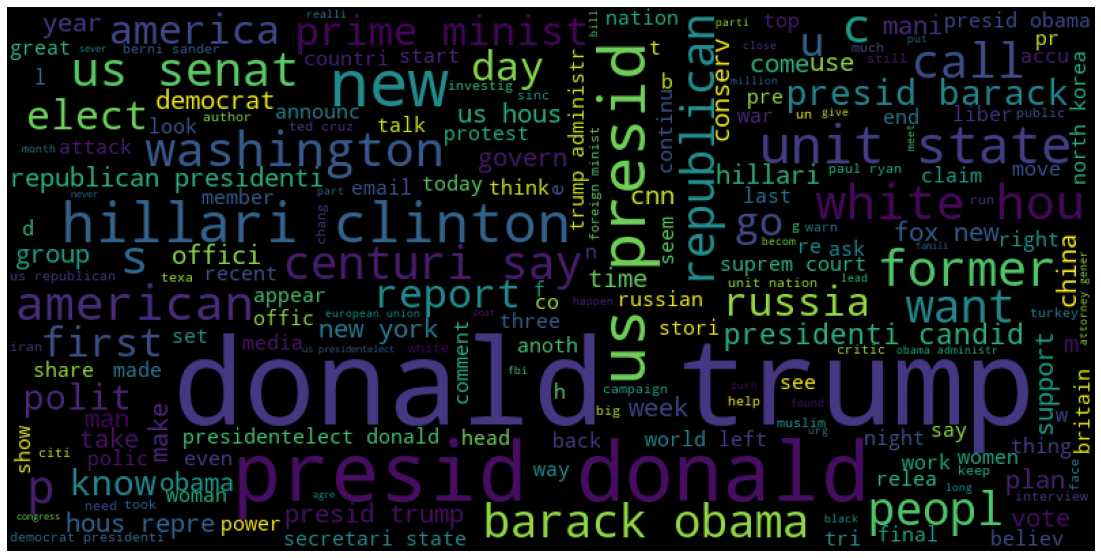

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20,10))

#convert list to string and generate
text = WordCloud(width=800, height=400).generate(df['text_porter_stemmed_for_visual'].to_string())
plt.imshow(text)
plt.axis("off")
plt.show()

In [33]:
articles_concat = []

for text in df['text_porter_stemmed_for_visual']:
    articles_concat += text

articles_concat

['head',
 'conserv',
 'republican',
 'faction',
 'us',
 'congress',
 'vote',
 'month',
 'huge',
 'expans',
 'nation',
 'debt',
 'pay',
 'tax',
 'cut',
 'call',
 'fiscal',
 'conserv',
 'urg',
 'budget',
 'restraint',
 'keep',
 'sharp',
 'pivot',
 'way',
 'among',
 'republican',
 'us',
 'repres',
 'mark',
 'meadow',
 'speak',
 'cb',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'feder',
 'spend',
 'lawmak',
 'brace',
 'battl',
 'return',
 'holiday',
 'lawmak',
 'begin',
 'tri',
 'pass',
 'feder',
 'budget',
 'fight',
 'like',
 'link',
 'issu',
 'immigr',
 'polici',
 'even',
 'congression',
 'elect',
 'campaign',
 'approach',
 'republican',
 'seek',
 'keep',
 'control',
 'congress',
 'presid',
 'donald',
 'trump',
 'republican',
 'want',
 'big',
 'budget',
 'increas',
 'militari',
 'spend',
 'democrat',
 'want',
 'proport',
 'increas',
 'nondefens',
 'discretionari',
 'spend',
 'program',
 'support',
 'educ',
 'scientif',
 'research',
 'infrastructur',
 'public',
 'health',
 'environmen

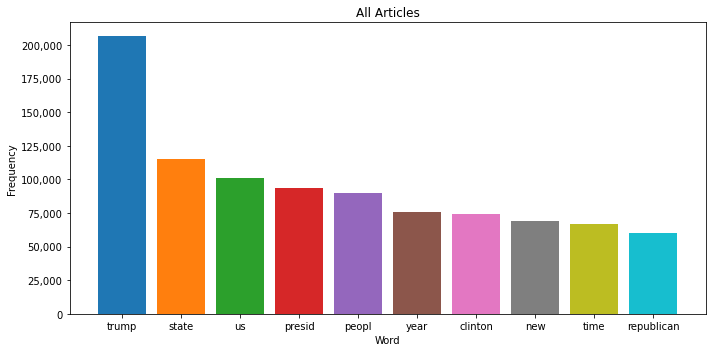

In [34]:
articles_freqdist = FreqDist(articles_concat)

fig, ax = plt.subplots(figsize=(10,5))

for i in range (0,10):
    plt.bar(articles_freqdist.most_common(10)[i][0], articles_freqdist.most_common(10)[i][1])

plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('All Articles')
ax.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
plt.tight_layout()

#articles_freqdist.plot(10,title='All Articles', cumulative=False)

In [35]:
display(articles_freqdist.most_common(200))

[('trump', 206430),
 ('state', 115054),
 ('us', 101110),
 ('presid', 93786),
 ('peopl', 89896),
 ('year', 75505),
 ('clinton', 74026),
 ('new', 69306),
 ('time', 67087),
 ('republican', 59964),
 ('govern', 54315),
 ('report', 53966),
 ('american', 52725),
 ('go', 52546),
 ('nation', 52501),
 ('elect', 51899),
 ('obama', 50463),
 ('make', 49916),
 ('democrat', 48398),
 ('countri', 48171),
 ('hous', 48142),
 ('support', 47187),
 ('call', 46778),
 ('use', 46742),
 ('campaign', 46130),
 ('even', 45993),
 ('get', 45619),
 ('unit', 45501),
 ('work', 44119),
 ('vote', 42493),
 ('polit', 42464),
 ('donald', 41852),
 ('mani', 41443),
 ('first', 41100),
 ('last', 41084),
 ('right', 40517),
 ('want', 40350),
 ('parti', 40319),
 ('take', 39833),
 ('day', 39794),
 ('white', 39568),
 ('news', 39164),
 ('includ', 38610),
 ('offici', 38409),
 ('hillari', 38082),
 ('say', 37585),
 ('offic', 35951),
 ('group', 35171),
 ('back', 34677),
 ('come', 34166),
 ('think', 34131),
 ('law', 33851),
 ('know', 3359

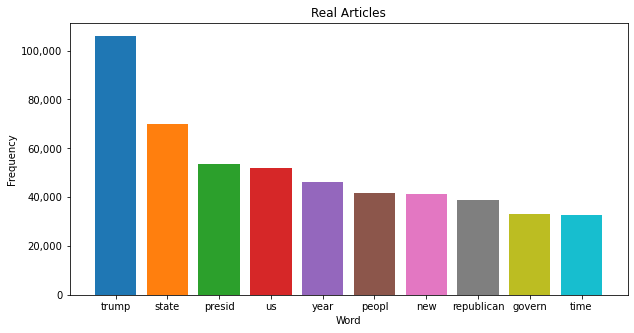

In [36]:
#frequency distribution for TRUE articles

articles_concat_true = []

for text in df[df['label']=='0']['text_porter_stemmed_for_visual']:
    articles_concat_true += text

articles_freqdist = FreqDist(articles_concat_true)

fig, ax = plt.subplots(figsize=(10,5))

for i in range (0,10):
    plt.bar(articles_freqdist.most_common(10)[i][0], articles_freqdist.most_common(10)[i][1])

plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Real Articles')
ax.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

In [37]:
display(articles_freqdist.most_common(200))

[('trump', 106022),
 ('state', 70043),
 ('presid', 53680),
 ('us', 52065),
 ('year', 46102),
 ('peopl', 41656),
 ('new', 41336),
 ('republican', 38838),
 ('govern', 32917),
 ('time', 32861),
 ('hous', 30936),
 ('unit', 29492),
 ('democrat', 29316),
 ('nation', 29017),
 ('report', 28808),
 ('clinton', 28601),
 ('countri', 27305),
 ('last', 27136),
 ('offici', 26507),
 ('parti', 26341),
 ('campaign', 26015),
 ('call', 25854),
 ('elect', 25466),
 ('senat', 24606),
 ('support', 24567),
 ('includ', 24444),
 ('work', 24102),
 ('go', 23813),
 ('make', 23796),
 ('american', 23198),
 ('first', 22791),
 ('polit', 22781),
 ('obama', 22751),
 ('vote', 21927),
 ('use', 21821),
 ('group', 21528),
 ('mani', 21257),
 ('day', 21128),
 ('week', 21033),
 ('offic', 20387),
 ('percent', 20285),
 ('white', 19877),
 ('want', 19850),
 ('take', 19826),
 ('even', 19648),
 ('secur', 19617),
 ('say', 19572),
 ('former', 19323),
 ('get', 19222),
 ('law', 19005),
 ('plan', 18447),
 ('right', 18444),
 ('back', 18245

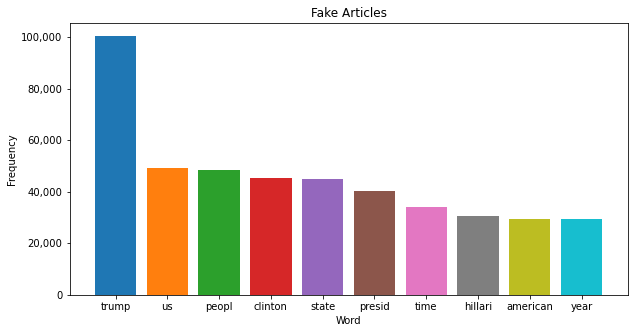

In [38]:
#frequency distribution for FAKE articles

articles_concat_false = []

for text in df[df['label']=='1']['text_porter_stemmed_for_visual']:
    articles_concat_false += text

articles_freqdist = FreqDist(articles_concat_false)

fig, ax = plt.subplots(figsize=(10,5))

for i in range (0,10):
    plt.bar(articles_freqdist.most_common(10)[i][0], articles_freqdist.most_common(10)[i][1])

plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Fake Articles')
ax.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

In [39]:
display(articles_freqdist.most_common(200))

[('trump', 100408),
 ('us', 49045),
 ('peopl', 48240),
 ('clinton', 45425),
 ('state', 45011),
 ('presid', 40106),
 ('time', 34226),
 ('hillari', 30634),
 ('american', 29527),
 ('year', 29403),
 ('go', 28733),
 ('new', 27970),
 ('obama', 27712),
 ('elect', 26433),
 ('get', 26397),
 ('even', 26345),
 ('make', 26120),
 ('report', 25158),
 ('use', 24921),
 ('donald', 24328),
 ('nation', 23484),
 ('support', 22620),
 ('right', 22073),
 ('know', 21687),
 ('govern', 21398),
 ('republican', 21126),
 ('news', 21068),
 ('call', 20924),
 ('countri', 20866),
 ('vote', 20566),
 ('want', 20500),
 ('mani', 20186),
 ('campaign', 20115),
 ('work', 20017),
 ('take', 20007),
 ('white', 19691),
 ('polit', 19683),
 ('media', 19465),
 ('democrat', 19082),
 ('world', 19072),
 ('day', 18666),
 ('think', 18568),
 ('come', 18534),
 ('first', 18309),
 ('say', 18013),
 ('way', 17765),
 ('america', 17656),
 ('hous', 17206),
 ('see', 16664),
 ('show', 16522),
 ('back', 16432),
 ('need', 16214),
 ('war', 16032),
 (

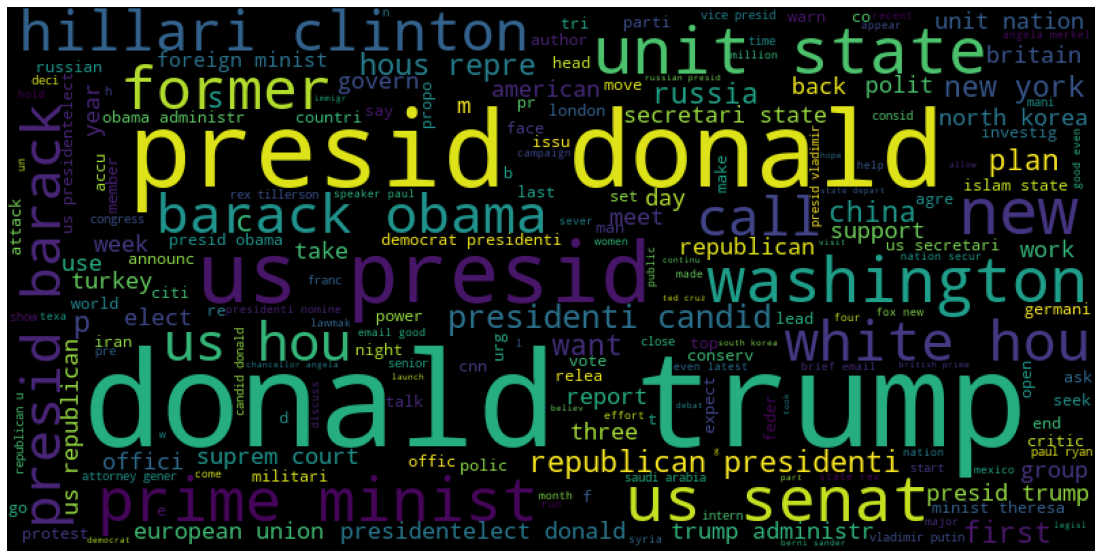

In [40]:
#word cloud for TRUE articles
plt.figure(figsize=(20,10))

text = WordCloud(width=800, height=400).generate(df[df['label']=='0']['text_porter_stemmed'].to_string())
plt.imshow(text)
plt.axis("off")
plt.show()

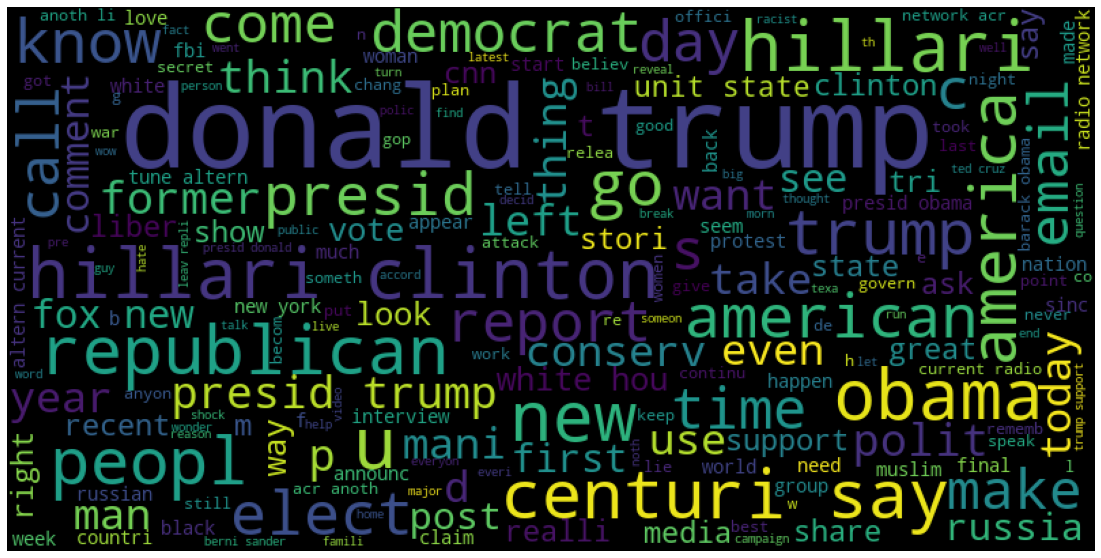

In [41]:
#word cloud for FAKE articles
plt.figure(figsize=(20,10))

text = WordCloud(width=800, height=400).generate(df[df['label']=='1']['text_porter_stemmed'].to_string())
plt.imshow(text)
plt.axis("off")
plt.show()

In [42]:
df

,title,text,label,source,text_cleaned,text_cleaned_tokenized,text_tokenized_string,text_pos_lemmatized,text_snowball_stemmed,text_porter_stemmed_for_visual,text_porter_stemmed,text_lancaster_stemmed,text_pos_tagged
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,head conservative republican faction us congre...,"[head, conservative, republican, faction, us, ...",head conservative republican faction us congre...,head conservative republican faction us congre...,head conserv republican faction us congress vo...,"[head, conserv, republican, faction, us, congr...",head conserv republican faction us congress vo...,head conserv republ fact us congress vot mon h...,"[(head, NN), (conservative, JJ), (republican, ..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people allowed first time enlist u...,"[transgender, people, allowed, first, time, en...",transgender people allowed first time enlist u...,transgender people allow first time enlist us ...,transgend peopl allow first time enlist us mil...,"[transgend, peopl, allow, first, time, enlist,...",transgend peopl allow first time enlist us mil...,transgend peopl allow first tim enl us milit s...,"[(transgender, NN), (people, NNS), (allowed, V..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,special counsel investigation links russia pre...,"[special, counsel, investigation, links, russi...",special counsel investigation links russia pre...,special counsel investigation link russia pres...,special counsel investig link russia presid tr...,"[special, counsel, investig, link, russia, pre...",special counsel investig link russia presid tr...,spec counsel investig link russ presid trump e...,"[(special, JJ), (counsel, NN), (investigation,..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos aus...,"[trump, campaign, adviser, george, papadopoulo...",trump campaign adviser george papadopoulos aus...,trump campaign adviser george papadopoulos aus...,trump campaign advis georg papadopoulo austral...,"[trump, campaign, advis, georg, papadopoulo, a...",trump campaign advis georg papadopoulo austral...,trump campaign adv georg papadopoulo aust dipl...,"[(trump, NN), (campaign, NN), (adviser, NN), (..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called us postal servic...,"[president, donald, trump, called, us, postal,...",president donald trump called us postal servic...,president donald trump call us postal service ...,presid donald trump call us postal servic char...,"[presid, donald, trump, call, us, postal, serv...",presid donald trump call us postal servic char...,presid donald trump cal us post serv charg muc...,"[(president, NN), (donald, NN), (trump, NN), (..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper unloaded black celebrities met donald t...,"[rapper, unloaded, black, celebrities, met, do...",rapper unloaded black celebrities met donald t...,rapper unload black celebrity meet donald trum...,rapper unload black celebr met donald trump el...,"[rapper, unload, black, celebr, met, donald, t...",rapper unload black celebr met donald trump el...,rap unload black celebr met donald trump elect...,"[(rapper, NN), (unloaded, VBD), (black, JJ), (..."
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,green bay packers lost washington redskins wee...,"[green, bay, packers, lost, washington, redski...",green bay packers lost washington redskins wee...,green bay packer lose washington redskins week...,green bay pa

In [43]:
# average character length of data articles
df['text_cleaned'].str.len().mean()

2177.6397614648076

In [44]:
# average character length of TRUE articles
true_lengths = df[df['label']=='0']['text_cleaned'].str.len()
true_lengths.mean()

2303.352823445318

In [45]:
# average character length of FAKE articles
false_lengths = df[df['label']=='1']['text_cleaned'].str.len()
false_lengths.mean()

2057.05024546776

In [46]:
#t-test

#null = there is no difference in article length between REAL and FAKE
#alternative = there is a difference in article length between REAL and FAKE

stats.ttest_ind(false_lengths.values, true_lengths.values)

#Reject null. There is a difference in article length between REAL and FAKE

Ttest_indResult(statistic=-13.365389605266412, pvalue=1.0782490373786889e-40)

In [47]:
# average word length of data articles
df['text_cleaned_tokenized'].str.len().median()

212.0

In [48]:
# average word length of TRUE articles
true_lengths = df[df['label']=='0']['text_cleaned_tokenized'].str.len()
true_lengths.median()

233.0

In [49]:
# average word length of FAKE articles
false_lengths = df[df['label']=='1']['text_cleaned_tokenized'].str.len()
false_lengths.median()

193.0

In [50]:
#t-test

#null = there is no difference in word length between REAL and FAKE
#alternative = there is a difference in word length between REAL and FAKE

stats.ttest_ind(false_lengths.values, true_lengths.values)

#Reject null. There is a difference in word length between REAL and FAKE

Ttest_indResult(statistic=-13.466230279378424, pvalue=2.7761024777949837e-41)

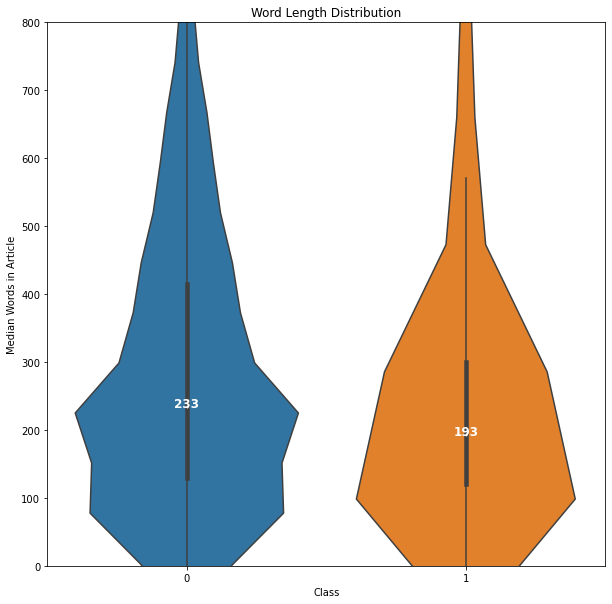

In [51]:
df['word_length'] = df['text_cleaned_tokenized'].str.len()

fig, ax = plt.subplots(figsize=(10,10))
p = sns.violinplot(x='label', y='word_length', data=df)
p.set(ylim=(0,800))
p.set_ylabel('Median Words in Article')
p.set_xlabel('Class')
p.set_title('Word Length Distribution')

medians = round(df.groupby(['label'])['word_length'].median(),0).astype(int).values

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick],medians[xtick], 
            horizontalalignment='center',size='large',color='w',weight='semibold');

In [52]:
df[df['label'] == '1']['title'][72024]

'Lawyer Who Kept Hillary Campaign Chief Out of Jail in DOJ Hillary Probe'

In [53]:
df

,title,text,label,source,text_cleaned,text_cleaned_tokenized,text_tokenized_string,text_pos_lemmatized,text_snowball_stemmed,text_porter_stemmed_for_visual,text_porter_stemmed,text_lancaster_stemmed,text_pos_tagged,word_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,ISOT,head conservative republican faction us congre...,"[head, conservative, republican, faction, us, ...",head conservative republican faction us congre...,head conservative republican faction us congre...,head conserv republican faction us congress vo...,"[head, conserv, republican, faction, us, congr...",head conserv republican faction us congress vo...,head conserv republ fact us congress vot mon h...,"[(head, NN), (conservative, JJ), (republican, ...",405
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,ISOT,transgender people allowed first time enlist u...,"[transgender, people, allowed, first, time, en...",transgender people allowed first time enlist u...,transgender people allow first time enlist us ...,transgend peopl allow first time enlist us mil...,"[transgend, peopl, allow, first, time, enlist,...",transgend peopl allow first time enlist us mil...,transgend peopl allow first tim enl us milit s...,"[(transgender, NN), (people, NNS), (allowed, V...",343
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,ISOT,special counsel investigation links russia pre...,"[special, counsel, investigation, links, russi...",special counsel investigation links russia pre...,special counsel investigation link russia pres...,special counsel investig link russia presid tr...,"[special, counsel, investig, link, russia, pre...",special counsel investig link russia presid tr...,spec counsel investig link russ presid trump e...,"[(special, JJ), (counsel, NN), (investigation,...",243
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,ISOT,trump campaign adviser george papadopoulos aus...,"[trump, campaign, adviser, george, papadopoulo...",trump campaign adviser george papadopoulos aus...,trump campaign adviser george papadopoulos aus...,trump campaign advis georg papadopoulo austral...,"[trump, campaign, advis, georg, papadopoulo, a...",trump campaign advis georg papadopoulo austral...,trump campaign adv georg papadopoulo aust dipl...,"[(trump, NN), (campaign, NN), (adviser, NN), (...",214
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,ISOT,president donald trump called us postal servic...,"[president, donald, trump, called, us, postal,...",president donald trump called us postal servic...,president donald trump call us postal service ...,presid donald trump call us postal servic char...,"[presid, donald, trump, call, us, postal, serv...",presid donald trump call us postal servic char...,presid donald trump cal us post serv charg muc...,"[(president, NN), (donald, NN), (trump, NN), (...",466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72028,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,Kaggle,rapper unloaded black celebrities met donald t...,"[rapper, unloaded, black, celebrities, met, do...",rapper unloaded black celebrities met donald t...,rapper unload black celebrity meet donald trum...,rapper unload black celebr met donald trump el...,"[rapper, unload, black, celebr, met, donald, t...",rapper unload black celebr met donald trump el...,rap unload black celebr met donald trump elect...,"[(rapper, NN), (unloaded, VBD), (black, JJ), (...",161
72029,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,Kaggle,green bay packers lost washington redskins wee...,"[green, bay, packers, lost, washington, redski...",green bay packers lost washington redskins wee...,green bay packer lose 

Let's save this dataframe to use for modeling.

In [54]:
pickle.dump(df, open( "Master_df.p", "wb"))